---

## Wikispeedia: What the hell is this?


Since the earliest records, humans have wandered across endless lands and walked thorugh mysterious paths, in an attempt to uncover the unexplored and find better conditions for their tribes. The rise of agriculture and the industrial era has, however, changed things, turning us into bare sedentary animals... until now! 

![](images/heComputer.gif)

[Wikispeedia](https://dlab.epfl.ch/wikispeedia/play/) is an easy and fun game: You are given two Wikipedia articles, and starting from the first article, your goal is to reach the second one exclusively by following links in the articles you encounter, effectively letting you explore your own paths across the vast wikipedia, for free! Your game data is collected by [The EPFL Data Science Lab](https://dlab.epfl.ch/), which helps us and them better understand some aspects of human behaviour 😉.

Using this data, we ask ourselves, are there patterns in the way players navigate the network, that make them more successful? That is, are there any optimal strategy that doesn't require extensive knowledge of the network?

Players are faced with multiple stimulae during the playing session, and players' decisions as well as their posterior success may be influenced by them. For example, users might navigate the network through `semantic similarity` optimization, or they might just click the links found in `images` or `tables`, etc.

Do these particular features have any effect on players' success? Let's see!

Whatever
---

## A look into the collected data...



# Players as humans 
### Strategies and attitudes

Being the Wikispeedia game and **individual** and **timed game**, players responses to the challenge it serves are miscellaneous. 
Individuals may **consciously** come up with a **strategy** to tackle the task they are assigned to, or **unintentionally** manifest a **behavior** that could be observed by scrupulous data analysts, like us. 
The Wikispeedia game itself was designed to extrapolate information allowing the computation of semantic distance between real-world concepts, to be leveraged in intelligent applications. 
Less ambitiously, we’re interest in outlining players mutual attitudes and the likeliness these **lead** them to **succeed in the game**, potentially a causal relationship. 
Among the manifold performable strategies we hypothesised the following:
- clicking on hyperlinks showing up at the **top** of the article page;
- clicking on hyperlinks showing up in **image captions**;
- clicking hyperlinks that are **semantically related** to the previously clicked;  
- clicking hyperlinks that are semantically related to the **target article**. 

_Look at the webpage below, isn’t your gaze naturally directed towards those velvet red petals?_
This is what we’re talking about. 

![](images/Aesthetics.png)

As “the Parthenon's facade” showing a marvellous  “interpretation of golden rectangles in its proportions” is judged to be aesthetically valuable by humans ability to discriminate at a sensory level, it is also true that **visual content attracts human attention** more than raw text. 

Additionally, picture yourself in a **competitive framework**, with a stopwatch in your left hand and your right trembling fingers on a mouse, determined to break down the shortest ever recorded Wikispeedia game and be remembered for eternity. 
Wouldn’t you click on **top-positioned hyperlinks** or would you parse the article in search for the best catch?

![](images/stressed.png)
https://www.dreamstime.com/failed-stressed-businessman-tired-to-work-computer-put-hands-head-busy-time-hard-working-cartoon-background-image163719368


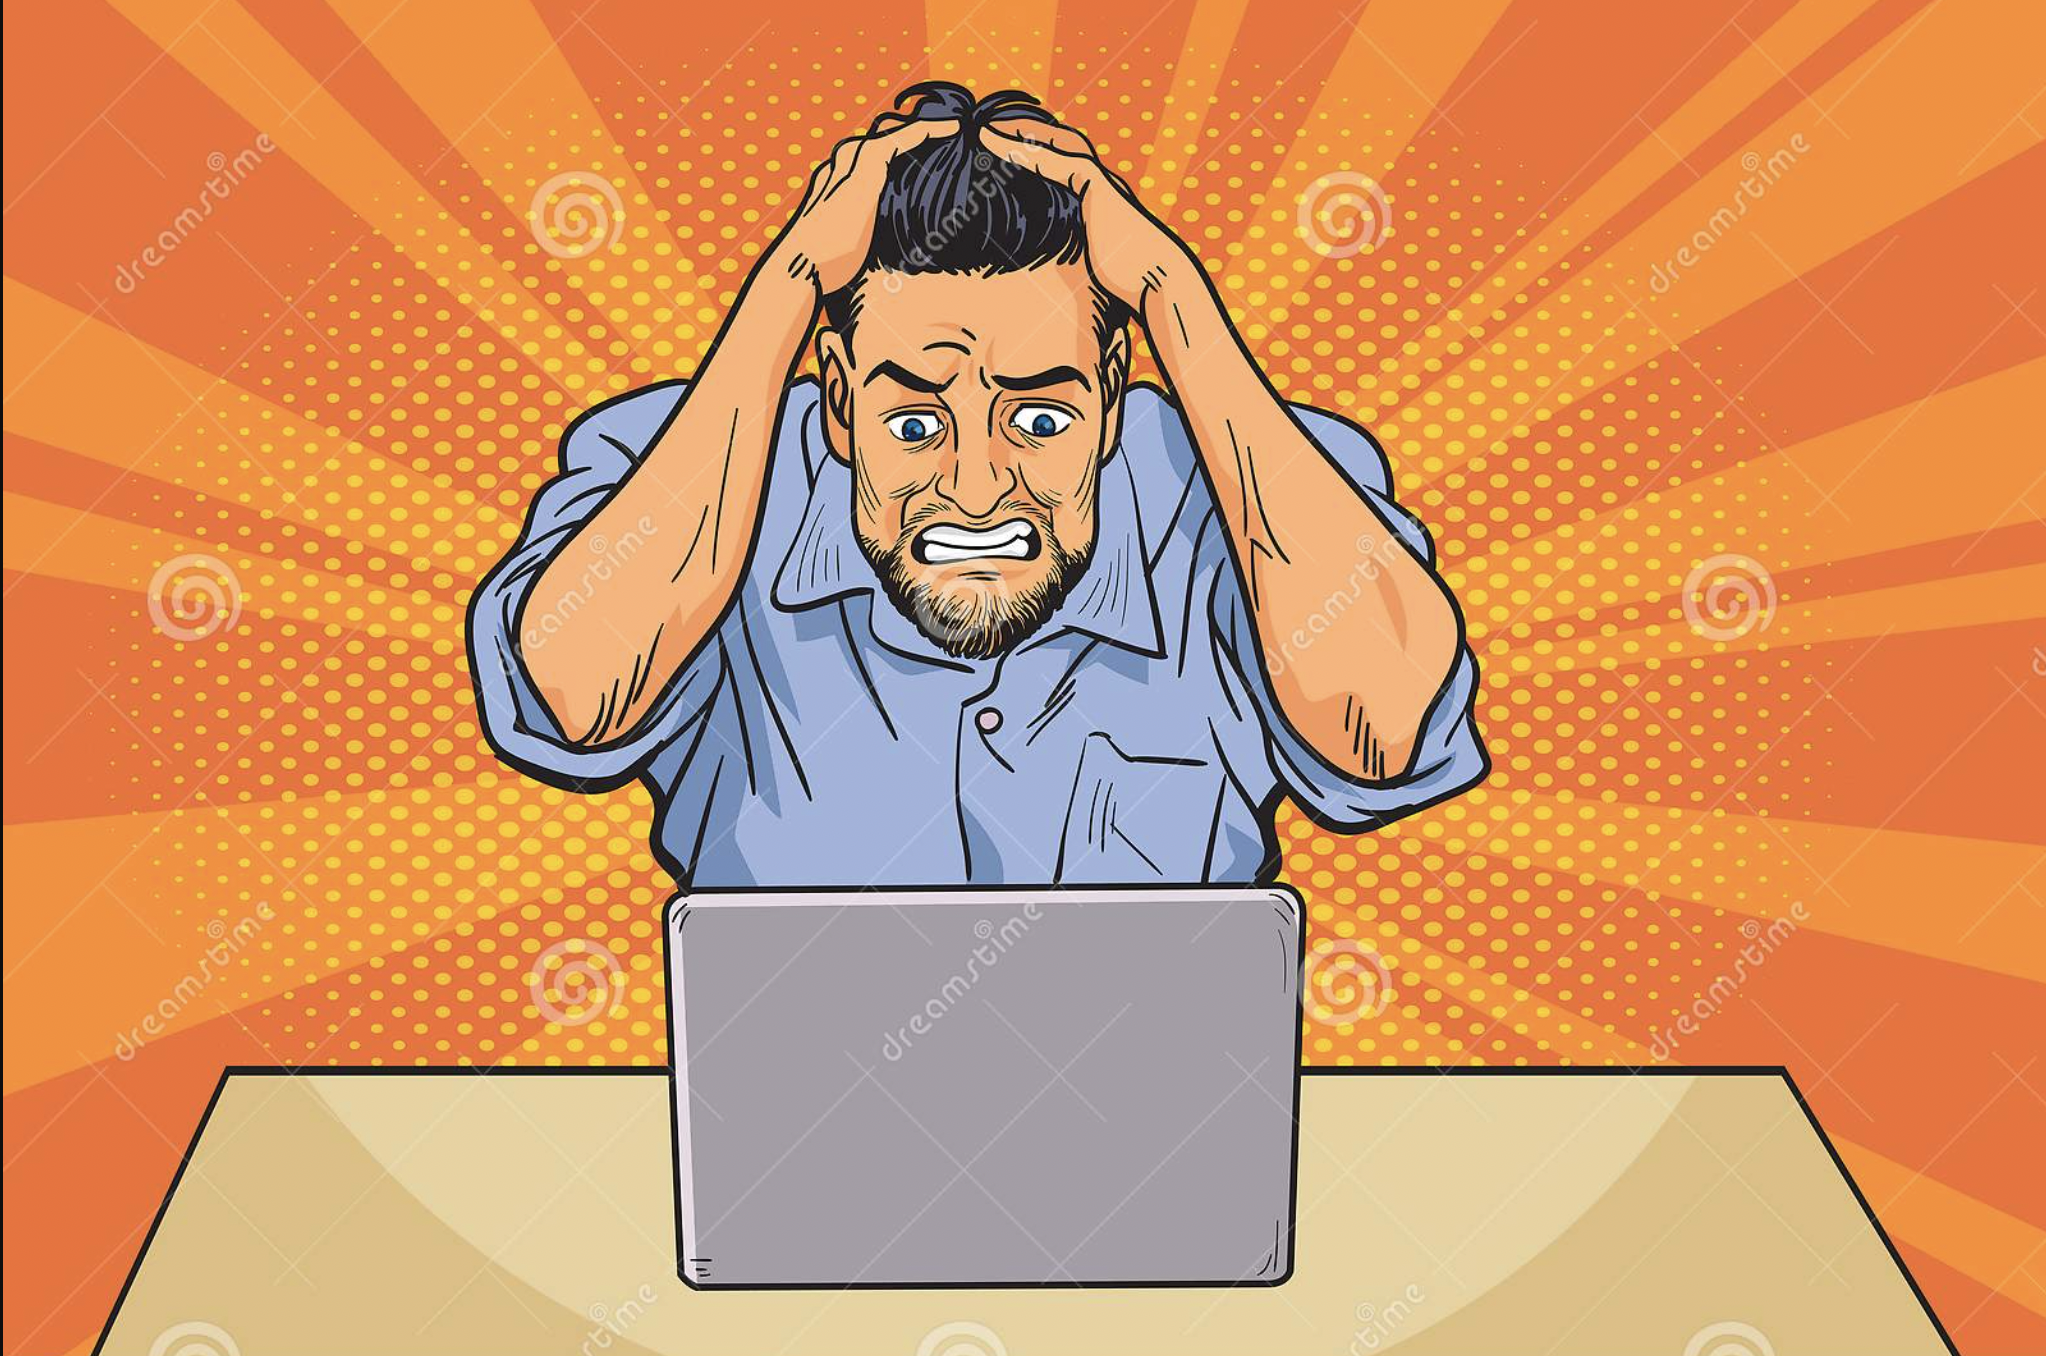

In [3]:
from IPython.display import Image
Image('images/stressed.png', width=600,height=600)

In deed, this is the case, at least for the majority of participants to the game. 

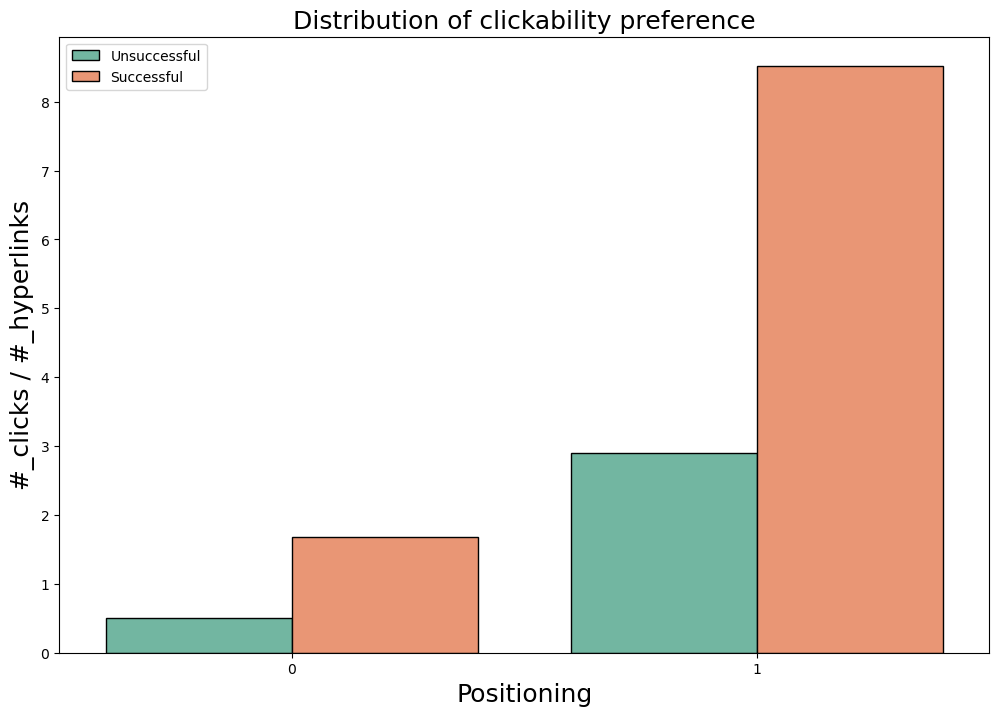

In [5]:
Image('images/Distribution_clickability_preference_img.png', width=600,height=600)

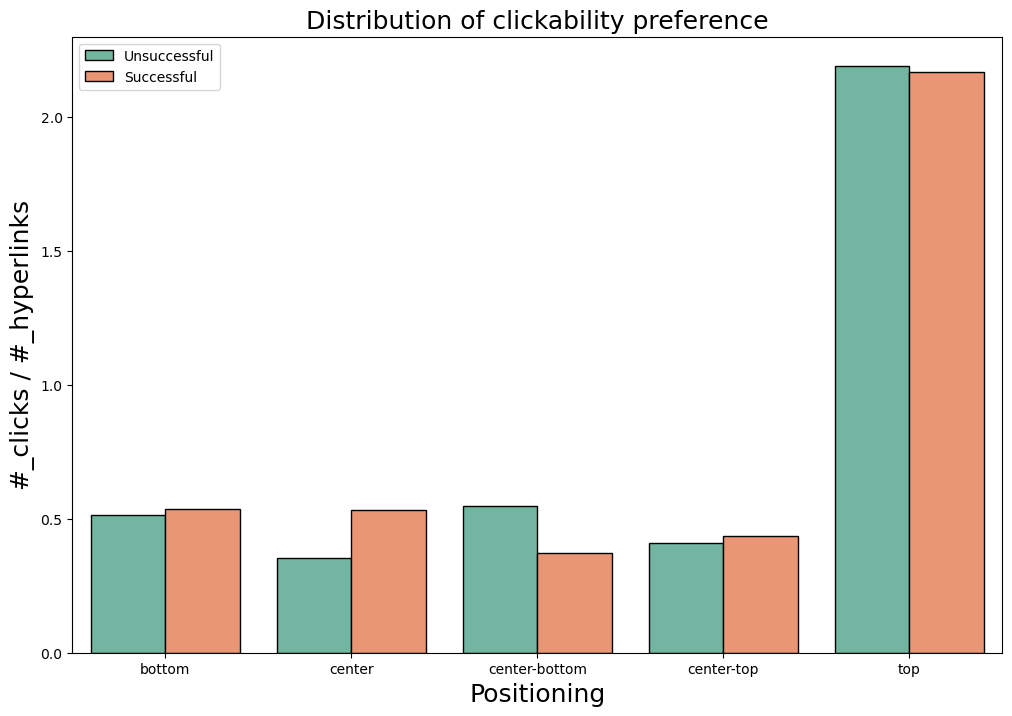

In [6]:
Image('images/Distribution_clickability_preference_pos.png', width=600,height=600)

Next, a little trickier to understand: **semantic similarity**. Semantic similarity is a metric that evaluates the distance between items on the basis of the **likeness of their meaning** or semantic content. Humans at play, challenged to reach a target article, whereof the only information they’re provided with is a word or phrase, display common sense knowledge. They would, in fact, look for semantic **relatedness** in clicking the hyperlinks.
Thinking of the **hypertextual Wikipedia graph** alone, it can be viewed as a primitive semantic **network**: articles represent the concepts and the hyperlinks are the means of connection between them.
Two documents can be more or less "semantically related" if, naivly, the two "overlap" well, with regard to the words present in them and the way they are ordered or used in context. 

## Description in simple words on how to calculate cosine similarity

An attitude it is reasonable to suppose players would perform is to click on hyperlinks that are semantically closer and closer, along the human path to the target article. 
A finer one is to click on articles linked by increasing similarity (between two neighbouring articles along the path). 

## JEFF's PLOTS

# Methods

### Matching 

The methodology chosen for the data processing step is to perform a **matched analysis** with the final objective to test if specific **players' game strategies lead to success** in the Wikispeedia game. To this end a **logistic regression** is conducted with **players' success as the outcome** and the following **strategies as predictors**:
1. Positioning of the clicked hyperlinks;
2. Clicking hyperlinks in image captions;
3. Clicking articles with the following semantic similarity patterns:
   - increasing semantic similarity along the path between articles and the target article;
   - increasing semantic similarity along the path between two sequentially clicked articles.

Several **confounders** may affect the outcome of the regression analysis i.e. of the potential correlation between the aforementioned features and success.
To mention a few, the **“difficulty”** of the randomly assigned task (source and target articles), affects the players' successfulness together with the strategy adopted to address it. This “difficulty” could be naively measured by **shortest path distance** between the source and target article in the Wikispeedia hyperlinks graph (calculated with the Floyd-Warshall algorithm).
Additionally, the **characteristics** (e.g. nodes in- and out-degree, path legth) of the **"human path"** (i.e. the actual sequence of clicked hyperlinks by the player), again reasonably affects players successfulness and their choice for a strategy.

### Andres, comment curvature features

In order to remove the aforementioned confounders, the dataset is filtered and the matching is performed accordingly with the assumptions made. Players are matched on same shortest path distance of the assigned task, and maximum **propensity score**, with the **treated subject** being the user performing a specific strategy (e.g. clicking more frequently than the average on hyperlinks showing up in images’ captions) and the **controlled subject** being the user NOT performing the strategy.

The analysis challenge can be reformulated as follows: _**“being assigned an equally difficult task and being equally free to perform a specific strategy, are players more successful if they adopt that specific strategy?”**_

#### Calculation of propensity score

The purpose motivating the matched analysis is to obtain a "balanced" testing dataset, with subjects actually comparable. In fact, we want to test potential correlation (causation ?) between specific strategies performed and players' success. The players tested should then be at the **same starting point** when choosing what strategy to adopt, i.e. have same probability to get the treatment (a.k.a. propensity score).
The propensity scores are obtained by calculating the **predicted outcomes of a logistic regression** with the outcome being the _probability of treatment_ and the predictors being _features of the human paths_.
The **treated subject** is the _user performing the specific strategy_, the **controlled subjct** is the user _NOT performing the specific startegy_.

### Logistic regression
**Finally, let's test if there's a programmatic way to win this game!!** <br>
A logistic regression analysis is conducted with the outcome being players' success in the game and the predictors being the strategies performed by the players. 


How are the data distributed among successful and unsuccessful games? The following plots show 

1. The distributions of optimal lengths of the proposed games.
2. The distributions of path lengths obtained by humans.

In [ ]:
# take a look at the shortest_path distributions
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,1, 
                       figsize=(10,8), 
                       gridspec_kw={"hspace":0.4})
plt.rcParams["font.size"] = 12


successful_counts = (successful_df['shortest_path_length']
                     .value_counts()
                     .reset_index())
successful_counts["success"] = "successful"

unsuccessful_counts = (unsuccessful_df['shortest_path_length']
                       .value_counts()
                       .reset_index())
unsuccessful_counts["success"] = "unsuccessful"

all_counts = pd.concat([successful_counts, 
                        unsuccessful_counts], 
                       axis=0)

sns.barplot(data=all_counts, 
            x="index", 
            y="shortest_path_length", 
            hue="success",
            ax=ax[0], 
            palette=["#b2df8a", "#1f78b4"])

ax[0].set_ylabel('Absolute Counts'); 
ax[0].set_xlabel('Shortest Path');
ax[0].set_title("1. Optimal lengths of the proposed games.")
#Count of human paths, stratified by shortest possible path")

ax[0].legend(loc=1)
ax[0].set_ylabel('Absolute Counts') 
ax[0].set_xlabel('Shortest Path')



# Next plot: frequency by human length
successful_human_path_lengths_3 = (successful_df
                                   [successful_df['shortest_path_length'] == 3]
                                   ['human_path_length']
                                   .value_counts()
                                   .reset_index())

successful_human_path_lengths_3["success"] = "successful"

unsuccessful_human_path_lengths_3 = (unsuccessful_df
                                     [unsuccessful_df['shortest_path_length'] == 3]
                                     ['human_path_length']
                                     .value_counts()
                                     .reset_index())

unsuccessful_human_path_lengths_3["success"] = "unsuccessful"

all_path_l3 = pd.concat([successful_human_path_lengths_3,
                         unsuccessful_human_path_lengths_3])

sns.barplot(data=all_path_l3, 
            x="index", 
            y="human_path_length", 
            hue="success", 
            ax=ax[1],
            palette=["#b2df8a", "#1f78b4"])

ax[1].set_xlim(-0.5,10.5)

ax[1].set_ylabel('Absolute Counts')
ax[1].set_xlabel('Human path length')
ax[1].set_title("2. Path lengths obtained by human players, when optimal length is 3.")
# Count of human path lengths, with shortest possible path = 3");

ax[1].legend(loc=1);




Given a shortest path length of 3, the majority of human path lengths are 3, 4, 5 for both successful and unsuccessful paths. Let's filter the corresponding DataFrames to only keep these path lengths. The matched analysis will be done with these lengths.

---

## And now the real deal

We wanna test wheather different strategies lead to success in the Wikispeedia game. With this goal in mind, paths can be characterized through local features of the clicked links and articles. The features we extract are:

- Relative position of each hyperlink within the current article.
- Is the hyperlink next to an image?
- Is the hyperlink inside a table?
- Similarity between current and target article.
- Hyperlink curvature along the path.

Once each path has been featurized we perform a matching analysis that lets us reduce the bias in the distributions of successful and unsuccessful populations. For this, we find pairs of `subjects` (paths) in the dataset, that have very similar features, but differ in the one we want to test (the `treatment`). The new distributions will then be much less biased and we will be able to compare the effect of the treatment variable. 

### Confounding variables

Many factors can affect the analysis, among them:

1. the difficulty of each task, and 
2. the strategy adopted to solve it. 

To address the first, we naively quantify `difficulty` of a task as the minimum distance between the source and the target, as determined with the Floyed-Warshall algorithm, while the second is addressed through path length, e.g. the total number of links clicked by each player in the given game.

Controlling by such variables allows a first approximation to controlling these confounding effects.

### Treatment

We will test the effect of clicking mostly links in image boxes.

The question is then: given an equally difficult task assigned, and having a fixed number of possible choices to perform, are players more successful if they adopt `clicking mainly links in images` as a strategy?

In [ ]:

successful_df = successful_df[(successful_df['shortest_path_length'].apply(lambda x: x == 3))]
successful_df = successful_df[(successful_df['human_path_length'].apply(lambda x: 3 <= x <= 5))]
successful_df.head(3)




In [ ]:

unsuccessful_df = unsuccessful_df[(unsuccessful_df['shortest_path_length'].apply(lambda x: x == 3))]
unsuccessful_df = unsuccessful_df[(unsuccessful_df['human_path_length'].apply(lambda x: 3 <= x <= 5))]
unsuccessful_df.head(3)




At this point, we have filtered the successful and unsuccessful DataFrames by the following conditions:

    Shortest path length = 3 --> we hypothesize that all paths have the same "difficulty" by enforcing this
    The actual human path lengths are 3,4,5 --> the majority of human paths are within these lengths

The next step is to perform matching of datasets. To make this process possible, we first augment both successful and unsuccessful DataFrames with is_successful Boolean condition.


In [ ]:


successful_df['is_successful'] = 1
unsuccessful_df['is_successful'] = 0

# merge the successful and unsuccessful DataFrames
final_df = pd.concat([successful_df, unsuccessful_df])
final_df.reset_index(drop=True, inplace=True)

final_df.head(3)

# save the DataFrame
final_df.to_csv('final_df.csv')

# next, we will calculate "treatments" involving semantic distance metrics for the DataFrame



     



2 . Document Similarity
Similarity Between Wikipedia Articles: 'Bag-of-Words' Cosine Similarity Based on Word Frequencies

We are interested in measuring *similarity* between Wikipedia articles to investigate players' strategies in Wikispeedia. The proposed similarity is Cosine Similarity measured on word frequencies given a pair of articles. Therefore, the assumption we make is that articles with similar occurrences of words are similar.

In order to mitigate similarity due to common English words such as "the", we apply a filter as follows:

    Remove all Stop words as defined in Scikit-learn

    https://scikit-learn.org/stable/modules/feature_extraction.html#nqy18

    Remove all white spaces and \n characters

    Apply a scaled version of word frequency count as implemented in TfidfTransformer in Scikit-learn:

    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

The cell blocks below show our data processing pipeline.


In [ ]:


import os

base_path = '.data/plaintext_articles'
articles = os.listdir(base_path)
# sort the article names in alphabetical order. This is not strictly required
articles = sorted(articles)

def remove_duplicates_and_fix_names(articles: list):
    """this function parses all the articles provided in the plaintext folder and stores the
       names of all the articles after "cleaning" them (some articles containing accents have encoded names).
       The raw text from the files are also stored in a list after removing white spaces and empty lines."""
    
    def parse_text(article: str) -> str:
        """this helper function reads a raw text file and removes white spaces and empty lines."""
        with open(os.path.join(base_path, article)) as f:
            # remove white spaces
            raw_text = [line.rstrip() for line in f.readlines()]
            # remove empty lines
            raw_text = [line.strip() for line in raw_text if line != '']

            return str(raw_text)
    
    # some article names have errors - fix these
    article_names_cleaned, texts = [], []
    
    for article in articles:
        # the "%" character indicates an encoded name
        if "%" not in article:
            # store the article name
            article_names_cleaned.append(article)
            # store the raw text from the article
            texts.append(parse_text(article))
            
        else:
            with open(os.path.join(base_path, article), 'r') as f:
                # extract the correct name. It is always on the 3rd line of the article
                correct_name = f.readlines()[2].replace('\n', '')
                # store the article name
                article_names_cleaned.append(correct_name)
                # store the raw text from the article
                texts.append(parse_text(article))
                    
    
    # remove ".txt" from the article names
    article_names_cleaned = [article.replace('.txt', '') for article in article_names_cleaned]
    # remove list bracket from string casting of raw text
    texts = [text.replace('[', '') for text in texts]
    
    return article_names_cleaned, texts

article_names_cleaned, texts = remove_duplicates_and_fix_names(articles)



     


In [ ]:

# count word frequency using sklearn out-of-the-box functions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

# remove common stop words
tfid_vectorizer = TfidfVectorizer(stop_words='english')
# apply CountVectorizer and TfidfTransform sequentially
matrix = tfid_vectorizer.fit_transform(texts)
matrix = matrix.todense()

# by default, "TfidfVectorizer" uses l2 norm and thus, to obtain the Cosine Similarity,
# we simply perform a dot product of the matrix
cosine_sim = pd.DataFrame(np.dot(np.array(matrix), np.array(matrix).T), columns=article_names_cleaned)
# assign the index names also as the article names. This is used for easy querying pairs of articles
cosine_sim.index = article_names_cleaned        
cosine_sim


In [ ]:


# save the Cosine Similarity matrix so we do not have to re-compute it every time
np.save('cosine_similarity.npz', np.array(cosine_sim))



     


In [ ]:

import matplotlib.pyplot as plt

# let's take a look at the Cosine Similarity distribution of the most similar article to a given article
most_similar = []
for idx in range(len(cosine_sim)):
    # index [-2] because index [-1] is always = 1 since it is a self similarity
    most_similar.append(sorted(cosine_sim.iloc[idx])[-2])
    
# plot the similarities
pd.Series(most_similar).plot(kind='hist', edgecolor='k')
plt.title("Cosine Similarity Distribution of Most Similar Articles")
plt.xlabel("Cosine Similarity"); plt.ylabel("Absolute Counts")

# there are no glaring red flags, e.g., most Cosine Similarities close to 0 or 1


In [ ]:


# show a few concrete examples and see if our metric makes empirical sense
cosine_sim['Ukraine'].sort_values()

# results look reasonable



     


In [ ]:
cosine_sim['Zinc'].sort_values()
# results also look reasonable

In [ ]:
import seaborn as sns

# "Cygni" are star systems/extrasolar planets and thus are expected to be similar
# the time periods have some similarity
sns.clustermap(cosine_sim.iloc[10:20, 10:20])


In [ ]:


# "Cancri" are exoplanets and thus are expected to be similar
# we again see similarity between time periods
sns.clustermap(cosine_sim.iloc[50:60, 50:60])



     


In [ ]:


# after confirming that the Cosine Similarity method is informative, we next show the function
# we will use to extract similarity of articles in a navigation path

# first show a hard-coded navigation path for illustration
navigation_path = '14th_century;Time;Light;Rainbow'



     


In [ ]:

def get_path_cosine_similarity(path: str, matrix: pd.DataFrame, method: str='sequential') -> list:
    """this function takes a navigation path string and returns an array of the Cosine Similarity.
       Two methods are supported: 'sequential' (default) which measures the sequential similarity and 
       'target' which measures the similarity between the current article at the target article.
       
       Input:
       path: navigation path string
       matrix: pre-computed Cosine Similarity matrix
       method: measurement method (defaults to 'sequential')
       
       Return:
       list: list of similarity measures
    """
    
    # there is 1 article that is duplicated in the plaintext folder. Problematically, the duplicated
    # article has different names and navigation paths can point to these different names, yet the 
    # article is the same. This one exception is handled here. In the implementation, we do not have to 
    # worry about this particular article pointing back to itself as it is not possible
    
    # navigation paths are separated by ";"
    path = path.split(';')
    
    # if the path only contains the starting article, return None
    if len(path) == 1:
        return None
    
    path_sims = []
    
    def get_correct_name(query: str, base_path: str='.data/plaintext_articles') -> str:
        """this nested function is called in case a path contains error characters.
           Returns the fixed path so it can be used to query the Cosine Similarity matrix."""
        if '_' in query and '%' not in query:
            return query
        elif query in ['Podcasting', 'Color', 'Fencing', 'Anemia', 'Quito']:
            return query
        else:
            with open(os.path.join(base_path, f'{query}.txt'), 'r') as f:
                out = f.readlines()[2].replace('\n', '')
                return out
    
    # compute the similarity between sequential nodes
    # output list length is N-1
    if method == 'sequential':
        for idx in range(0, len(path)-1, 1):
            try:
                path_sims.append(matrix.loc[path[idx]].loc[path[idx+1]])
            except Exception:
                # either path or both paths could be wrong - just "fix" both
                # treat the 1 exception due to duplicated file
                if get_correct_name(path[idx]) == 'Polish–Muscovite War (1605–1618)':
                    sim = float(cosine_sim.loc['Polish–Muscovite War (1605–1618)'].drop_duplicates()[get_correct_name(path[idx+1])])
                    path_sims.append(sim)
                    
                elif get_correct_name(path[idx+1]) == 'Polish–Muscovite War (1605–1618)':
                    sim = cosine_sim.loc[get_correct_name(path[idx])].drop_duplicates()['Polish–Muscovite War (1605–1618)']
                    path_sims.append(sim)
                    
                else:
                    path_sims.append(matrix.loc[get_correct_name(path[idx])].loc[get_correct_name(path[idx+1])])

                    
    # compute the similarity between the current node and the target node
    # output list length is N
    elif method == 'target':
        for idx in range(0, len(path), 1):
            try:
                path_sims.append(matrix.loc[path[idx]].loc[path[-1]])
            except Exception:
                # either path or both paths could be wrong - just "fix" both
                # treat the 1 exception due to duplicated file
                if get_correct_name(path[idx]) == 'Polish–Muscovite War (1605–1618)':
                    sim = cosine_sim.loc['Polish–Muscovite War (1605–1618)'].drop_duplicates()[get_correct_name(path[-1])]
                    path_sims.append(sim)
                    
                elif get_correct_name(path[-1]) == 'Polish–Muscovite War (1605–1618)':
                    sim = float(cosine_sim.loc[get_correct_name(path[idx])].drop_duplicates()['Polish–Muscovite War (1605–1618)'])
                    path_sims.append(sim)
                    
                else:
                    path_sims.append(matrix.loc[get_correct_name(path[idx])].loc[get_correct_name(path[-1])])
    
    else:
        raise ValueError('Unsupported similarity method: choose from "sequential" or "target".')
        
    return path_sims


In [ ]:
print(navigation_path.split(';'))

# show the "sequential" method
sequential_sims = get_path_cosine_similarity(path=navigation_path,
                                             matrix=cosine_sim,
                                             method='sequential')
# intepreted as:
# sim(14th_century, Time) = 0.031
# sim(Time, Light) = 0.147
# sim(Light, Rainbow) = 0.158
# the similarity list is always N-1 in length, N = # nodes
sequential_sims


In [ ]:


# show the "target" method
target_sims = get_path_cosine_similarity(path=navigation_path,
                                         matrix=cosine_sim,
                                         method='target')
# intepreted as:
# sim(14th_century, Rainbow) = 0.008
# sim(Time, Rainbow) = 0.035
# sim(Light, Rainbow) = 0.158
# sim(Rainbow, Rainbow) = 1 (the path was successful so similarity is 1)
# the similarity list is now N in length, N = # nodes

# note: paths where the last index != 1 means the path was unsuccessful
target_sims



     


In [ ]:
# calculate the "sequential" and "target" cosine similarities and augment the DataFrame with these metrics
final_df['path_seq_cosine_sim'] = final_df['path'].apply(lambda x: get_path_cosine_similarity(x, matrix=cosine_sim))
final_df['path_target_cosine_sim'] = final_df['path'].apply(lambda x: get_path_cosine_similarity(x, matrix=cosine_sim, method='target'))

final_df.head(3)


In [ ]:

# next, write a function that returns whether the Cosine similarities in a navigation path are increasing/decreasing
def sims_to_bool_path(path: str):
    """this function takes a navgiation path as input and returns the path with same dimensions
       containing Booleans denoting whether the Cosine similarity is increasing"""
    bool_path = []
    for idx in range(len(path)-1):
        if path[idx+1] > path[idx]:
            bool_path.append(True)
        else:
            bool_path.append(False)
    
    return bool_path
        


In [ ]:


final_df['path_seq_boolean'] = final_df['path_seq_cosine_sim'].apply(sims_to_bool_path)
final_df['path_target_boolean'] = final_df['path_target_cosine_sim'].apply(sims_to_bool_path)

final_df.head(3)



     


In [ ]:
# this function filters paths that only contain strictly increasing Cosine similarities
def filter_strictly_increasing_sims(path_list: list):
    return False if False in path_list else True

final_df['seq_strictly_increasing'] = final_df['path_seq_boolean'].apply(filter_strictly_increasing_sims)
final_df['target_strictly_increasing'] = final_df['path_target_boolean'].apply(filter_strictly_increasing_sims)

final_df.head(3)


In [ ]:


# the matching algorithm requires some computation time
# compute the matched DataFrames all at once and save them so they can be read into memory directly

# there are 2 treatments
#    1. strictly increasing *sequential* Cosine similarity
#    2. strictly increasing *target* Cosine similarity

# there are also 3 conditions we filter on
#    1. human_path_length = 3
#    2. human_path_length = 4
#    3. human_path_length = 5

import networkx as nx

for treatment in ['seq_strictly_increasing', 'target_strictly_increasing']:
    for length in [3,4,5]:
    
        treatment_df = final_df[final_df[treatment] == True]
        control_df = final_df[final_df[treatment] == False]

        G = nx.Graph()

        for control_id, control_row in control_df.iterrows():
            for treatment_id, treatment_row in treatment_df.iterrows():
                # Adds an edge only for the same human path length
                if (control_row['human_path_length'] == length and treatment_row['human_path_length'] == length):
                    G.add_edge(control_id, treatment_id)

        matching = nx.max_weight_matching(G)
        matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
        balanced_df = final_df.iloc[matched]

        # save balanced_df
        balanced_df.to_csv(f'{treatment}_{length}.csv')



     


In [ ]:


# next, perform logistic regression on each treatment with fixed human path length

# read all the matched DataFrames into memory
df_seq_3 = pd.read_csv('seq_strictly_increasing_3.csv')
df_seq_4 = pd.read_csv('seq_strictly_increasing_4.csv')
df_seq_5 = pd.read_csv('seq_strictly_increasing_5.csv')

df_target_3 = pd.read_csv('target_strictly_increasing_3.csv')
df_target_4 = pd.read_csv('target_strictly_increasing_4.csv')
df_target_5 = pd.read_csv('target_strictly_increasing_5.csv')

# store all results in a dictionary
results = {}

import statsmodels.formula.api as smf

for df, experiment_name in zip([df_seq_3, df_seq_4, df_seq_5, df_target_3, df_target_4, df_target_5],
                               ['Sequential 3', 'Sequential 4', 'Sequential 5', 'Target 3', 'Target 4', 'Target 5']):
    
    if 'Sequential' in experiment_name:
        mod = smf.logit(formula='is_successful ~  seq_strictly_increasing', data=df)
    else:
        mod = smf.logit(formula='is_successful ~  target_strictly_increasing', data=df)
        
    res = mod.fit()
    
    # dictionary to store the coefficients and p-values of the current experiment
    curr_analysis = {}
    # store the intercept
    curr_analysis['Intercept'] = res.params[0]
    # store the intercept p-value
    curr_analysis['Intercept p-value'] = res.pvalues[0]
    # store the coefficient for **strictly increasing Cosine similarity**
    curr_analysis['Coefficient'] = res.params[1]
    # store the coefficient p-value
    curr_analysis['Coefficient p-value'] = res.pvalues[1]
    
    results[experiment_name] = curr_analysis
    
results_df = pd.DataFrame(results)



     
results_df



The syntax in the above table is interpreted as :

    Sequential means the strictly increasing Cosine similarity was measured for sequential articles
    Target means the strictly increasing Cosine similarity was measured based on sequential article compared to the target article
    The number indicates the human path length fixed. Previously, we also fixed that the shortest path length is 3.

Our research question is:

*When given X number of choices in the same difficulty game, how did successful and unsuccessful players differ in their clicking behaviour?*

Based on the above table, the p-values for both the incercept and coefficient for logistic regression are significant for all experiments except 1 (Sequential 5). The interpretation for all experiment findings are similar. Concretely, consider the experiment Sequential 3. The interpretation is:

    *Given a shortest path length of 3 (fixed difficulty) and given a human path length of 3 (when the human makes 3 choices on article clicks), clicking articles with increasing Cosine similarity between sequential articles (as a proxy to measure semantic meaning), leads to more successful outcomes.*

For Target experiments have a similar interpretation. Concretely, consider the experiment Target 5:

    *Given a shortest path length of 3 (fixed difficulty) and given a human path length of 5 (when the human makes 5 choices on article clicks), clicking articles with increasing Cosine similarity between the current article and the target article (as a proxy to measure semantic meaning), leads to more successful outcomes.*

These findings are interesting and suggest that (potentially contrarily to common sense) clicking articles based on semantic meaning can lead to more successful outcomes in the Wikispeedia game (at least the current version we are investigating).


In [ ]:
#| label: fig-polar
#| fig-cap: "A line plot on a polar axis"

import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r
fig, ax = plt.subplots(
  subplot_kw = {'projection': 'polar'} 
)
ax.plot(theta, r)
ax.set_rticks([0.5, 1, 1.5, 2])
ax.grid(True)
plt.show()